In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras import losses

import numpy as np
from keras import datasets  # mnist
from keras.utils import np_utils

import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance

Using TensorFlow backend.


In [2]:
import numpy as np
import xgboost as xgb
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline
import csv

In [3]:
train = pd.read_csv("C:\\Users\\munan\\Desktop\\contest\\train.csv", index_col=0)
test = pd.read_csv("C:\\Users\\munan\\Desktop\\contest\\test.csv", index_col=0)
submission = pd.read_csv("C:\\Users\\munan\\Desktop\\contest\\sample_submission.csv")

In [4]:
train['class_train'].value_counts()

2    157219
0    119996
1     42785
Name: class_train, dtype: int64

In [5]:
train['class_train'].nunique()

3

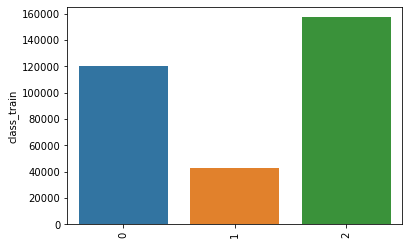

In [6]:
sns.barplot(train['class_train'].value_counts().index,train['class_train'].value_counts())
plt.xticks(rotation=90);

In [9]:
dered_col = [c for c in train.columns if c.find('dered')!=-1]
airmass_col = [c for c in train.columns if c.find('airmass')!=-1]
u_g_r_i_z = list(train.columns[0:5])
redshift_col = [c for c in train.columns if c.find('redshift')!=-1]

In [7]:
def plot_category_hist(data, col_list, category):
    for c in col_list:
        u = np.percentile(data[c],99.5)
        d = np.percentile(data[c],0.05)
        plt.figure(figsize=(5,6))
        for t in data[category].unique():
            sns.distplot(data.query(f'@d < @u and {category} == @t')[c])
        plt.title(c)
        plt.legend(data[category].unique())
        plt.show()

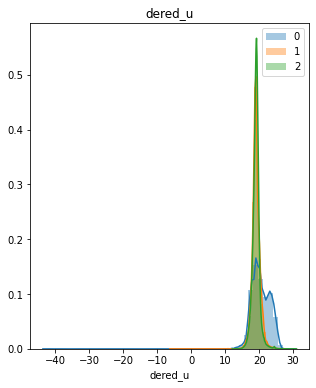

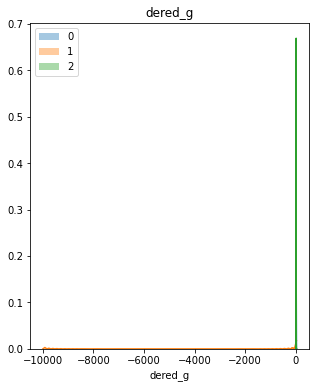

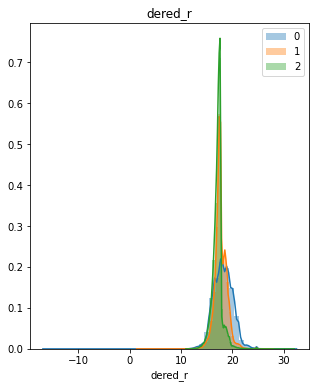

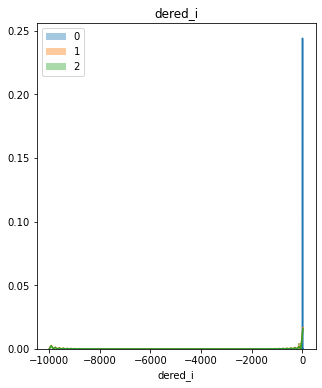

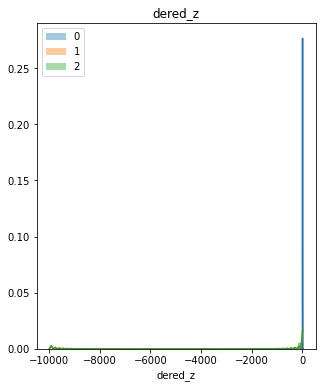

In [10]:
plot_category_hist(train, dered_col,'class_train')

In [11]:
X = train.iloc[:,:18]
Y = train.iloc[:,18:]

In [12]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [13]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# 선형회귀

In [14]:
from sklearn.linear_model import LinearRegression

In [16]:
line_fitter = LinearRegression()
line_fitter.fit(X_train, y_train)

LinearRegression()

In [17]:
y_predicted = line_fitter.predict(X_test)

In [19]:
rmse = lambda y,p:np.sqrt(np.mean((y_test-y_predicted)**2))
rmse(y_test,y_predicted)

0.9641777089183015

# 로지스틱 회귀

In [22]:
from sklearn.linear_model import LogisticRegression

In [28]:
X= train[train['class_train']!=0].drop('class_train',axis =1)
y = train[train['class_train']!=0]['class_train'].values -1

In [29]:
np.unique(y)

array([0, 1], dtype=int64)

In [30]:
from sklearn.metrics import log_loss,roc_auc_score

In [31]:
lr = LogisticRegression()
lr.fit(X,y)

C:\Users\munan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [32]:
p = lr.predict_proba(X)[:,1]

In [33]:
log_loss(y,p)

0.36533704902964337

In [34]:
roc_auc_score(y,p)

0.8768175415910515

In [36]:
lr.coef_,lr.intercept_

(array([[ 0.74614152,  0.01958959, -1.92160649,  0.5605609 , -0.5919809 ,
         -1.75092189,  2.34984129, -0.03563686, -1.36060418,  0.66569897,
         -0.60711556,  0.07350885, -0.08896188, -0.16400908, -0.16661603,
         -0.16155607, -0.16276475, -0.16529445]]),
 array([0.22258938]))

In [39]:
from kaggler.metrics import plot_roc_curve,plot_pr_curve

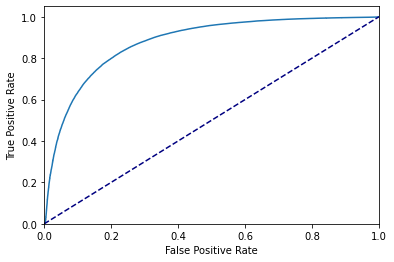

In [40]:
plot_roc_curve(y,p)

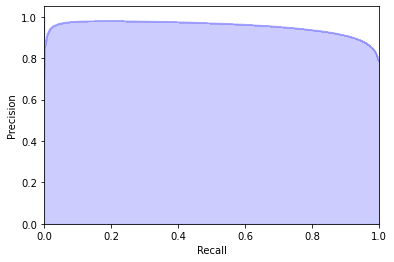

In [42]:
plot_pr_curve(y,p)